In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\clustering project\SG_2014.xlsx")

In [43]:
data.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,e_fg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,24483,2014,3857,A.J. Price,NaN,SG,27,5,NBA,MIN,28,0,99,19,46,0.413,6,22,0.273,13,24,0.542,0.478,0,2,0.000,1,9,10,13,1,0,7,5,44
1,24498,2014,3982,Alec Burks,NaN,SG,22,3,NBA,UTA,78,12,2193,380,831,0.457,50,143,0.350,330,688,0.480,0.487,279,373,0.748,59,198,257,212,69,14,149,190,1089
2,24500,2014,4063,Alexey Shved,NaN,SG,25,2,NBA,MIN,63,0,664,76,237,0.321,30,102,0.294,46,135,0.341,0.384,68,90,0.756,21,60,81,68,26,16,48,36,250
3,24502,2014,4143,Allen Crabbe,NaN,SG,21,1,NBA,POR,15,0,100,12,33,0.364,6,14,0.429,6,19,0.316,0.455,3,4,0.750,1,8,9,6,2,1,3,10,33
4,24510,2014,3171,Andre Miller,NaN,SG,37,15,NBA,TOT,58,2,982,106,231,0.459,11,21,0.524,95,210,0.452,0.483,60,77,0.779,28,102,130,197,34,9,61,75,283


In [44]:
pd.set_option('display.max_columns', None)

In [45]:
print(data)

     seas_id  season  player_id           player  birth_year pos  age  \
0      24483    2014       3857       A.J. Price         NaN  SG   27   
1      24498    2014       3982       Alec Burks         NaN  SG   22   
2      24500    2014       4063     Alexey Shved         NaN  SG   25   
3      24502    2014       4143     Allen Crabbe         NaN  SG   21   
4      24510    2014       3171     Andre Miller         NaN  SG   37   
..       ...     ...        ...              ...         ...  ..  ...   
128    25082    2014       3166     Vince Carter         NaN  SG   37   
129    25084    2014       3913  Wayne Ellington         NaN  SG   26   
130    25086    2014       3914  Wesley Matthews         NaN  SG   27   
131    25087    2014       4140      Will Barton         NaN  SG   23   
132    25089    2014       3492     Willie Green         NaN  SG   32   

     experience   lg   tm   g  gs    mp   fg   fga  fg_percent  x3p  x3pa  \
0             5  NBA  MIN  28   0    99   19  

In [46]:
pg_columns_to_keep =  ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']


# Keep only the specified columns for a point guard
filtered_df_pg = data[pg_columns_to_keep]

# Display the resulting DataFrame
print(filtered_df_pg)

      pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0      44    6    1    1   13   10    0   0         0.478       0.413   
1    1089   50   69   59  212  257   14  12         0.487       0.457   
2     250   30   26   21   68   81   16   0         0.384       0.321   
3      33    6    2    1    6    9    1   0         0.455       0.364   
4     283   11   34   28  197  130    9   2         0.483       0.459   
..    ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
128   967  146   61   67  212  284   35   0         0.497       0.407   
129   145   25   16    8   19   43    2   1         0.536       0.437   
130  1343  201   76   51  197  289   14  82         0.541       0.441   
131   166   10    9   16   33   74    7   0         0.449       0.417   
132   273   41   22   12   50   78   11   9         0.452       0.376   

     x3p_percent  
0          0.273  
1          0.350  
2          0.294  
3          0.429  
4          0.524  
..       

In [47]:
filtered_df_pg_placeholder = filtered_df_pg.fillna(-1)

C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

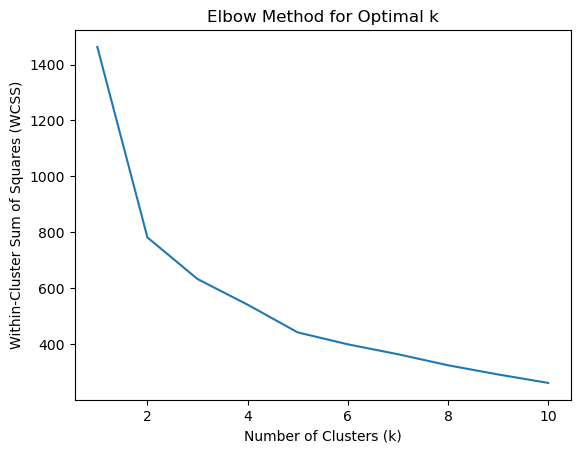

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'filtered_df_pg_placeholder' is your preprocessed DataFrame

# Impute any remaining missing values (if any)
imputer = SimpleImputer(strategy='mean')
filtered_df_pg_imputed = pd.DataFrame(imputer.fit_transform(filtered_df_pg_placeholder), columns=filtered_df_pg_placeholder.columns)

# Standardize the data
scaler = StandardScaler()
filtered_df_pg_standardized = scaler.fit_transform(filtered_df_pg_imputed)

# Use the Elbow Method to determine the optimal number of clusters (k)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(filtered_df_pg_standardized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [49]:
optimal_k = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(filtered_df_pg_standardized)

# Add the cluster labels to your DataFrame
filtered_df_pg_placeholder['Cluster'] = cluster_labels

# Display the resulting DataFrame with cluster labels
print(filtered_df_pg_placeholder)

      pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0      44    6    1    1   13   10    0   0         0.478       0.413   
1    1089   50   69   59  212  257   14  12         0.487       0.457   
2     250   30   26   21   68   81   16   0         0.384       0.321   
3      33    6    2    1    6    9    1   0         0.455       0.364   
4     283   11   34   28  197  130    9   2         0.483       0.459   
..    ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
128   967  146   61   67  212  284   35   0         0.497       0.407   
129   145   25   16    8   19   43    2   1         0.536       0.437   
130  1343  201   76   51  197  289   14  82         0.541       0.441   
131   166   10    9   16   33   74    7   0         0.449       0.417   
132   273   41   22   12   50   78   11   9         0.452       0.376   

     x3p_percent  Cluster  
0          0.273        2  
1          0.350        1  
2          0.294        2  
3          

C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


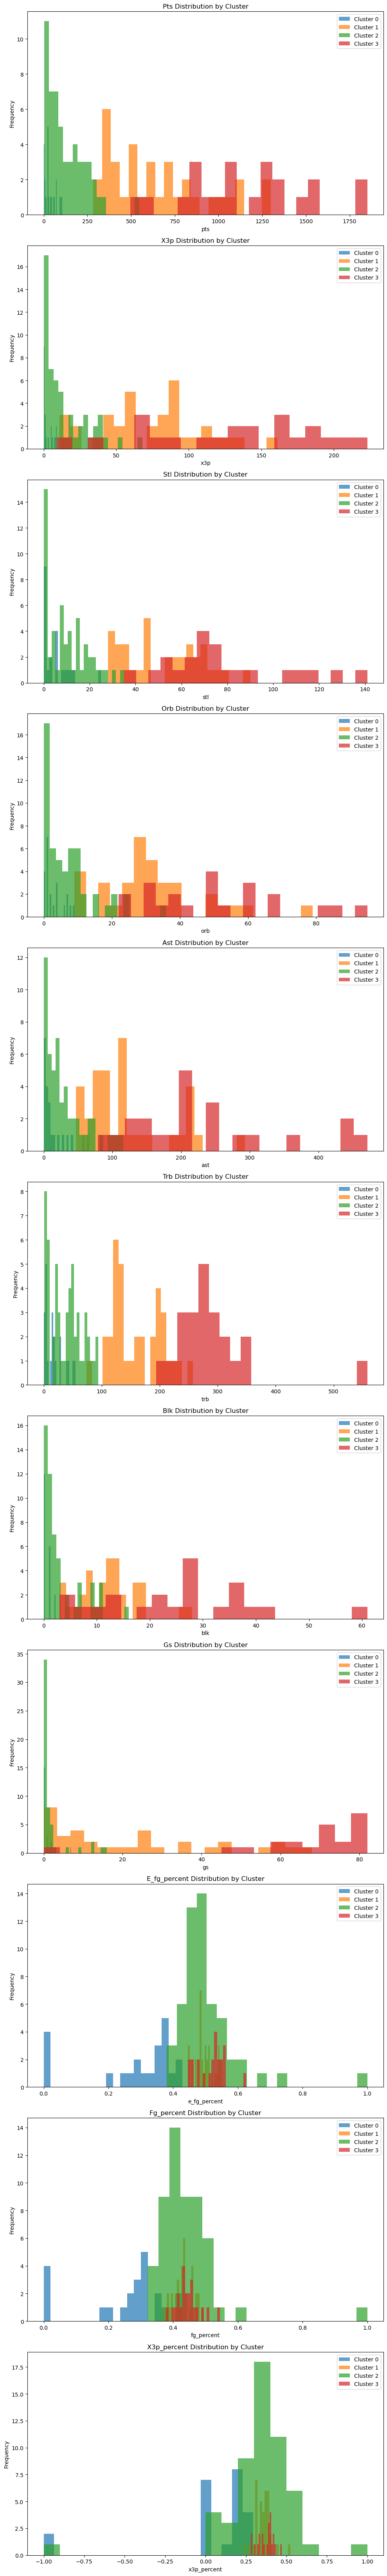

In [50]:
import matplotlib.pyplot as plt

# Features to plot
features_to_plot = ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']

# Set up subplots
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(10, 6 * len(features_to_plot)))

# Plot each feature for each cluster
for i, feature in enumerate(features_to_plot):
    for cluster in range(optimal_k):
        # Select data for the current cluster
        cluster_data = filtered_df_pg_placeholder[filtered_df_pg_placeholder['Cluster'] == cluster]
        
        # Plot the feature for the current cluster
        axes[i].hist(cluster_data[feature], bins=20, alpha=0.7, label=f'Cluster {cluster}')

    # Set labels and title for each subplot
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].set_title(f'{feature.capitalize()} Distribution by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()
